In [1]:
import palantir as pala
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

Setting up the environment

In [2]:
# Execution start begin with timing
start_time = time.time()
sc.settings.verbosity = 3
fig_res = 150
sc.set_figure_params(dpi = fig_res, frameon = 0)

# MIK67 = Ki67, TNSFRSF19 = TROY
gastric_stem = ['LGR5', 'ASCL2', 'CD44', 'STMN1', 'BMI1', 'LRIG1', 'TNFRSF19', 'SOX2']
intestinal_stem = ['SMOC2', 'OLFM4']
stem = gastric_stem + intestinal_stem # Currently, this is an overall list of all the markers used to look at any stem cells in either the intestines or the stomach.

inspect_stem = ['leiden', 'MKI67', 'LGR5', 'ASCL2', 'CD44', 'SMOC2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'BHLHA15', 'TNFRSF19', 'SOX2', 'leiden', 'Localization']
inspect_stem_duo = ['leiden', 'MKI67', 'LGR5', 'ASCL2', 'CD44', 'SMOC2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'leiden', 'Localization']

inspect_stem_gast = ['leiden', 'MKI67', 'LGR5', 'TNFRSF19', 'ASCL2', 'CD44', 'SMOC2', 'SOX2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'leiden', 'Localization']

gastric_markers = ['leiden', 'MKI67', 'LGR5', 'TNFRSF19', 'BHLHA15', 'ASCL2', 'CD44', 'SMOC2', 'SOX2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'MUC6', 'TFF2', 'MUC5AC', 'GKN2', 'TFF1', 'GHRL', 'AQP5', 'MUC1', 'leiden', 'Localization']
duodenal_markers = ['leiden', 'MKI67', 'LGR5', 'TNFRSF19', 'BHLHA15', 'ASCL2', 'CD44', 'SMOC2', 'SOX2', 'STMN1', 'OLFM4', 'BMI1', 'LRIG1', 'MUC6', 'MUC2', 'TFF3', 'GHRL', 'AQP5', 'MUC1', 'ANPEP', 'LYZ', 'leiden', 'Localization']

global_res = 0.5

In [3]:
path = 'S:/data cache/code_in_out/agr2/script_02_out/'
pat_ant = sc.read_h5ad(path + 'patant_reproc.h5ad')
cont_ant = sc.read_h5ad(path + 'contant_reproc.h5ad')
duo_cont = sc.read_h5ad(path + 'duocont_reproc.h5ad')
duo_pat = sc.read_h5ad(path + 'duopat_reproc.h5ad')

In [4]:
path = 'S:/data cache/code_in_out/agr2/agr2_init_files/Aline/raw_data/'
col_org_unfilt = sc.read_h5ad(path + 'agr2colon_organoids_unfilt.h5ad')
ant_unfilt = sc.read_h5ad(path + 'agr2_unfilt_antrum.h5ad')
duo_unfilt = sc.read_h5ad(path + 'agr2_unfilt_duodenum.h5ad')
col_unfilt = sc.read_h5ad(path + 'agr2_unfilt_colon.h5ad')

In [5]:
barcodes = pat_ant.obs_names.tolist()
adat = ant_unfilt[barcodes]
adat = pat_ant

Importing libraries

In [6]:
import scFates as scf
import os
import sys

inferring a principal curve --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01
    finished (0:00:01) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


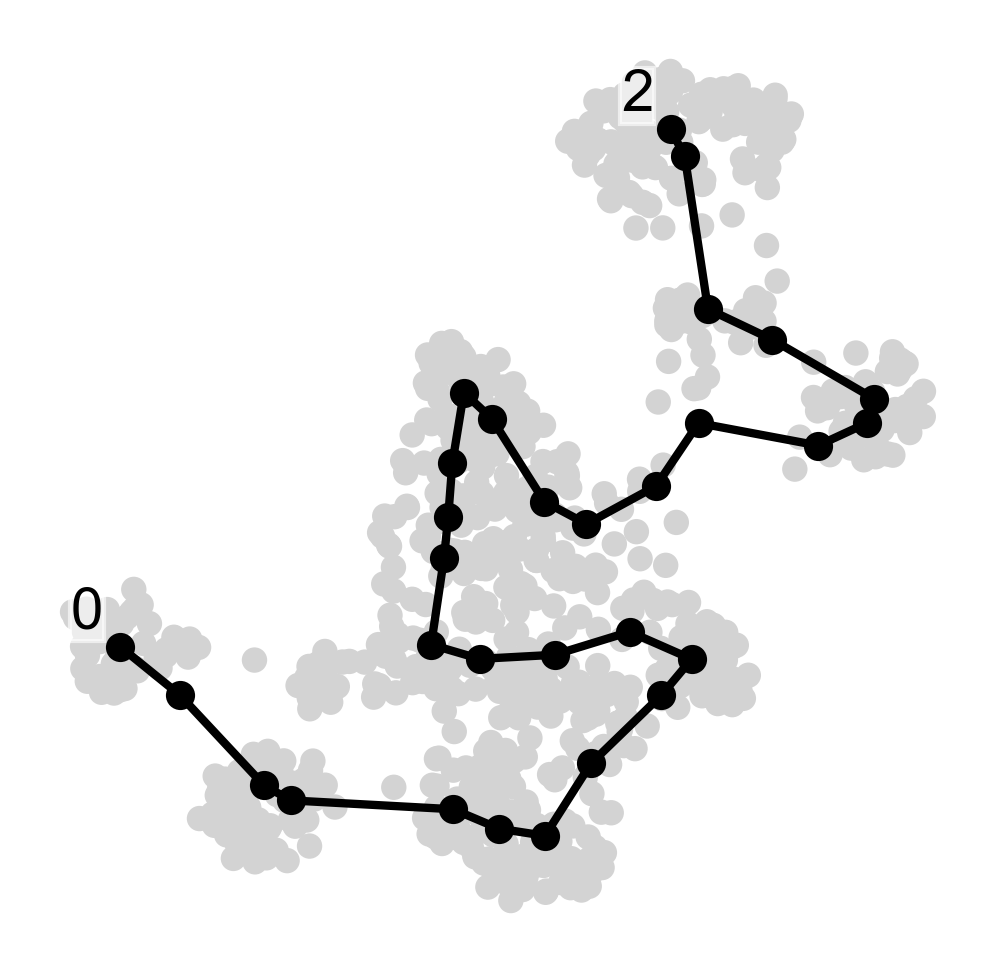

In [7]:
scf.tl.curve(adata = adat, Nodes = 30, use_rep = 'umap', ndims_rep = 2)
scf.pl.graph(adata = adat, basis = 'umap')

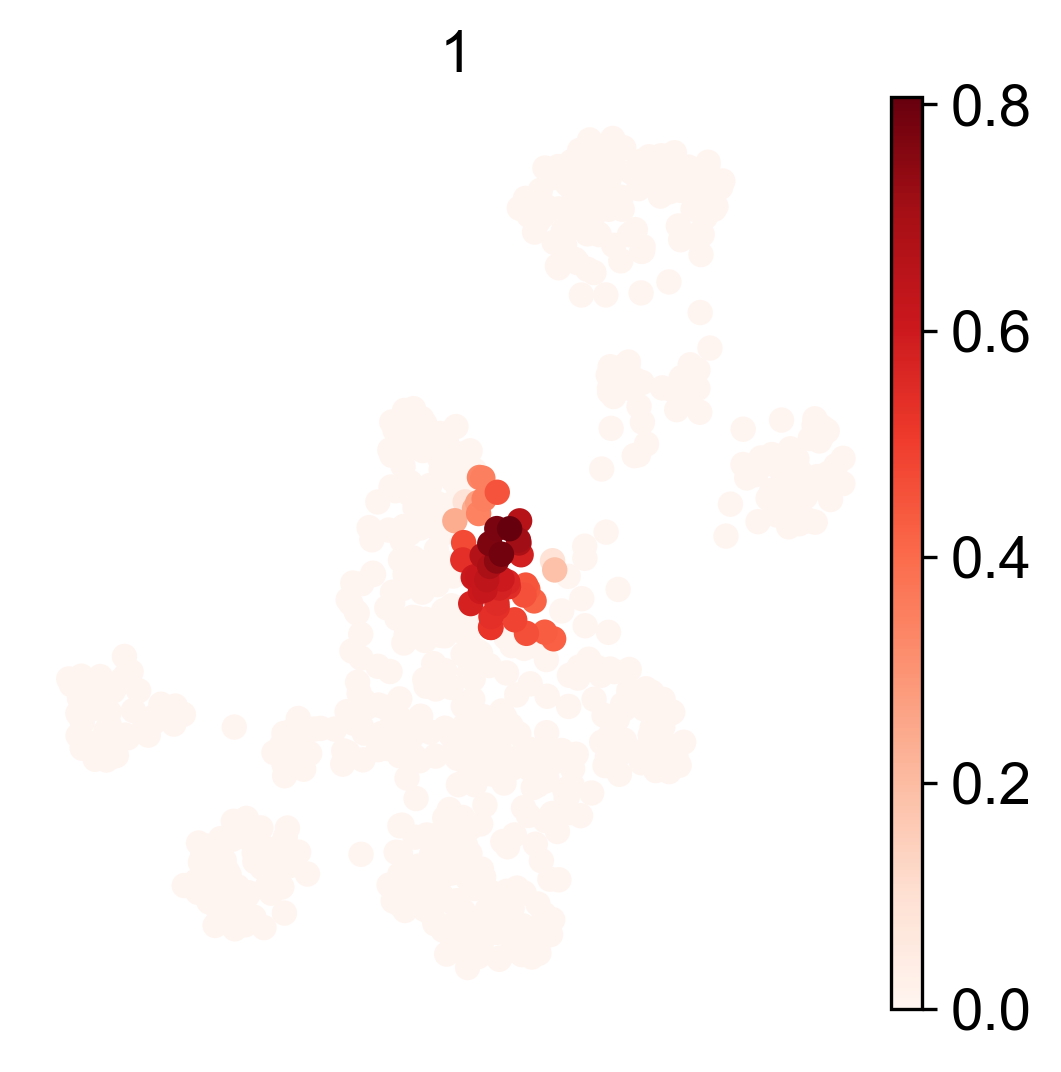

In [8]:
sc.pl.umap(sc.AnnData(adat.obsm["X_R"], obsm = adat.obsm), color = "1", cmap = "Reds")

automatic root selection using LGR5 values
node 9 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    mappings: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.89it/s]
    finished (0:00:17) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


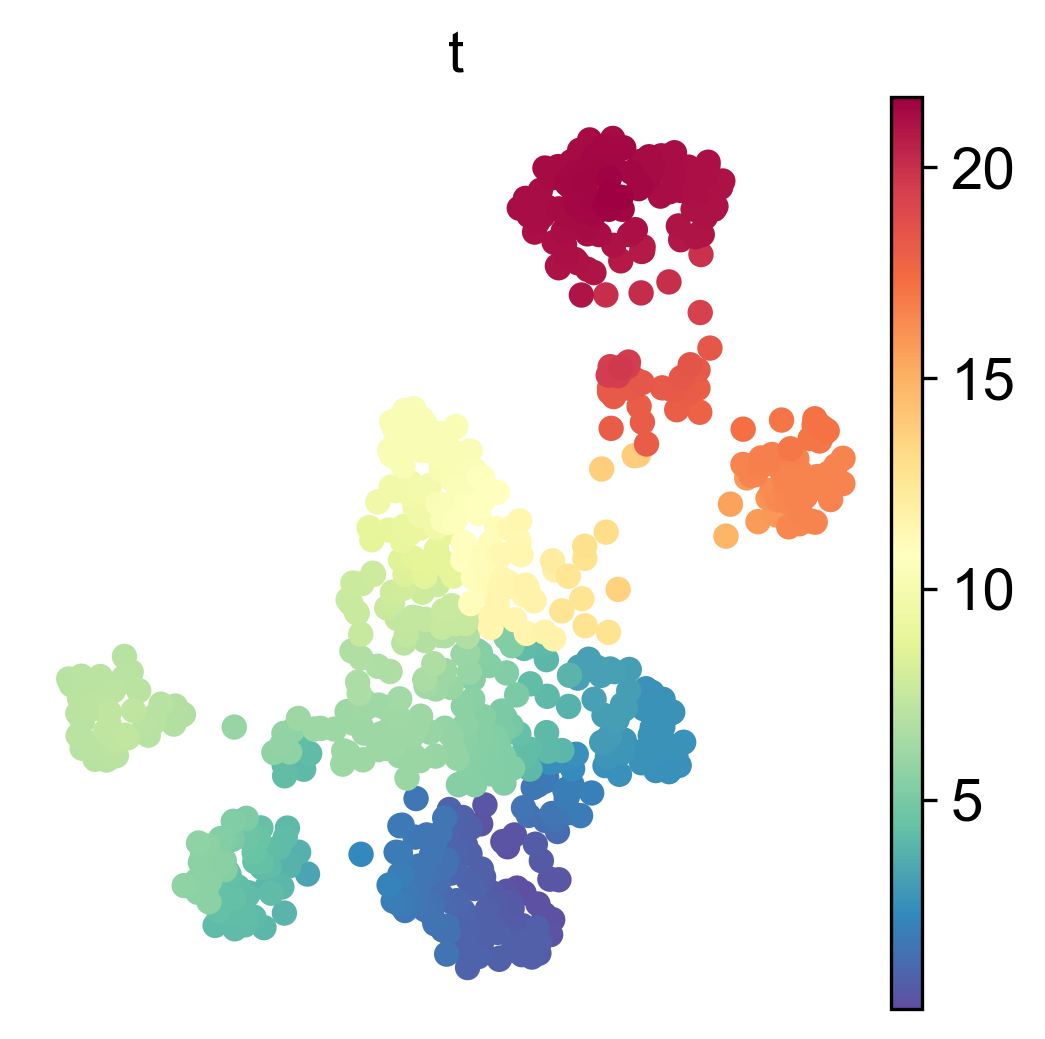

In [9]:
scf.tl.root(adat, 'LGR5')
scf.tl.pseudotime(adat, n_jobs=20, n_map=100)
sc.pl.umap(adat, color = 't')

C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


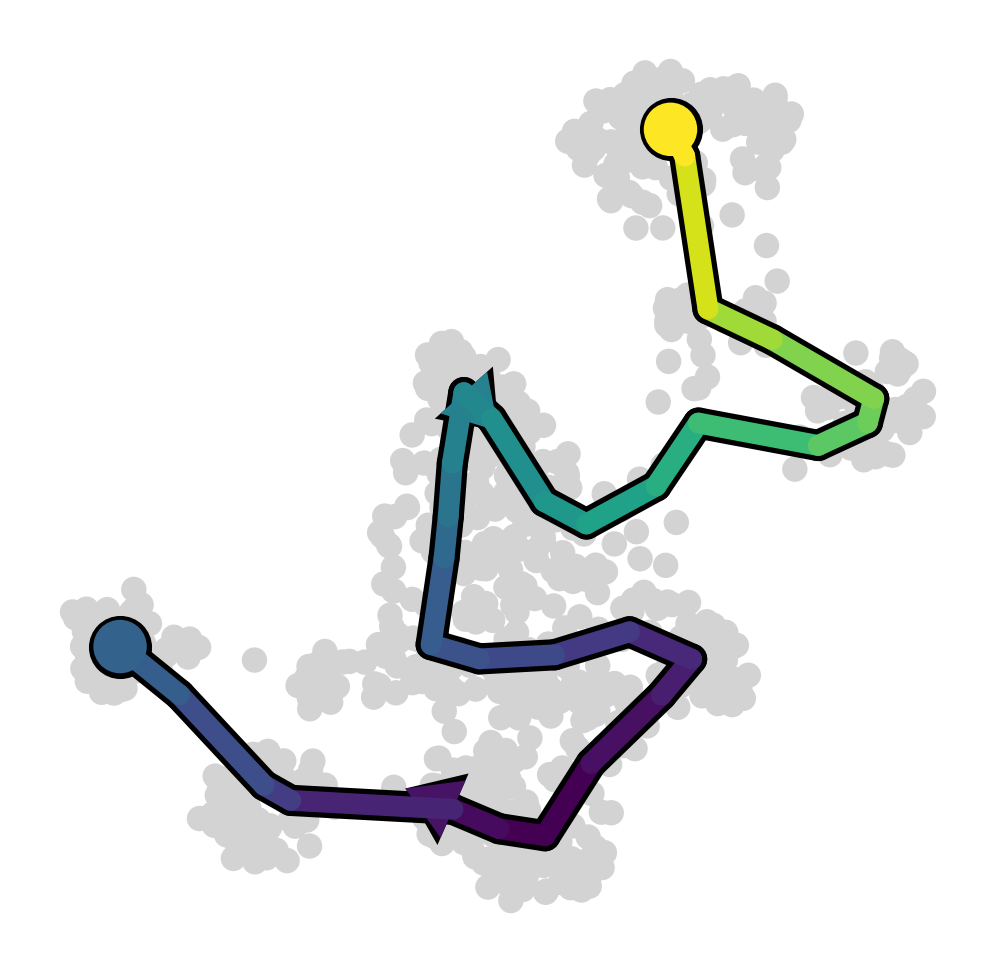

In [10]:
scf.pl.trajectory(adat, basis='umap', arrows=True, arrow_offset=3)

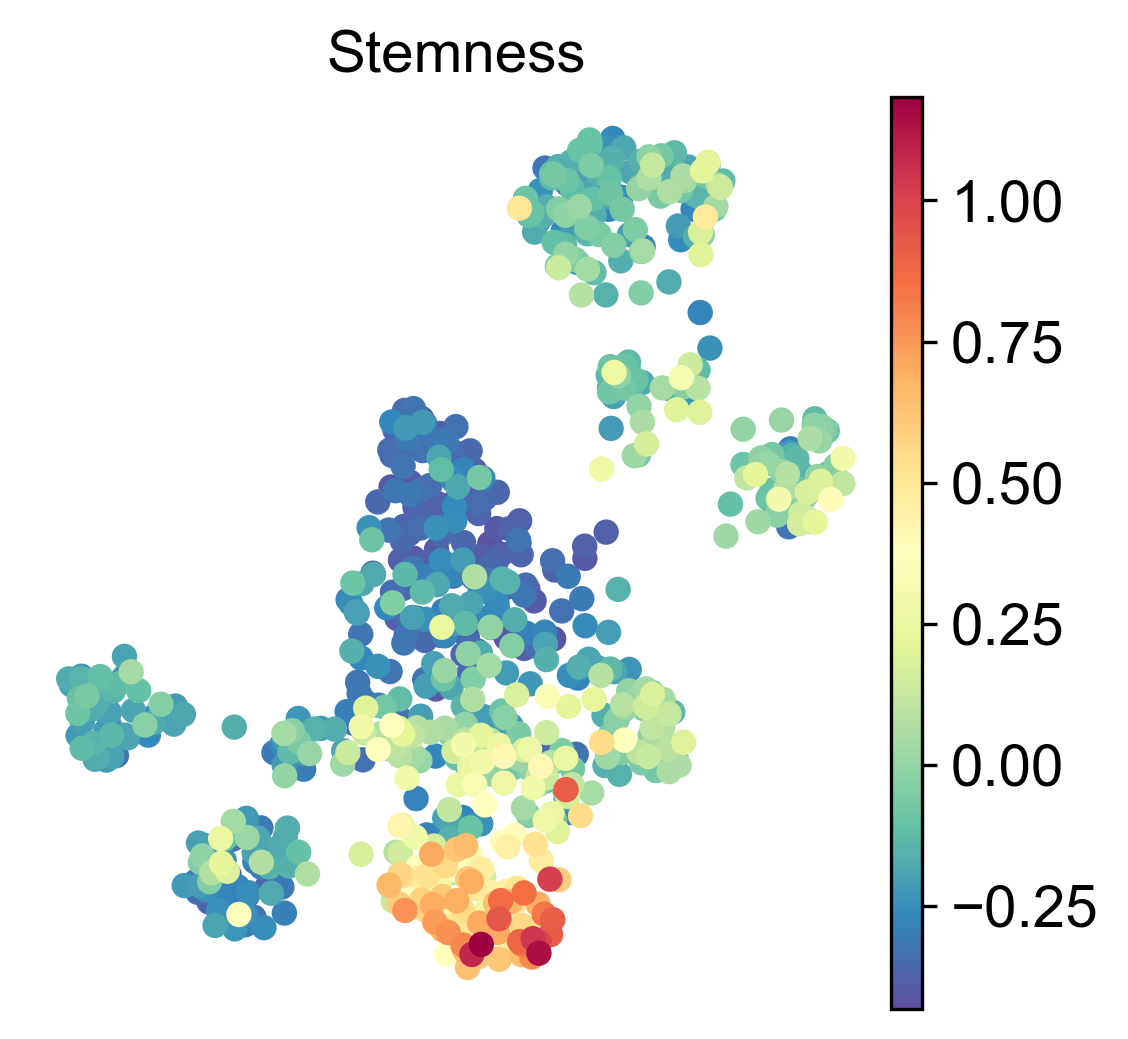

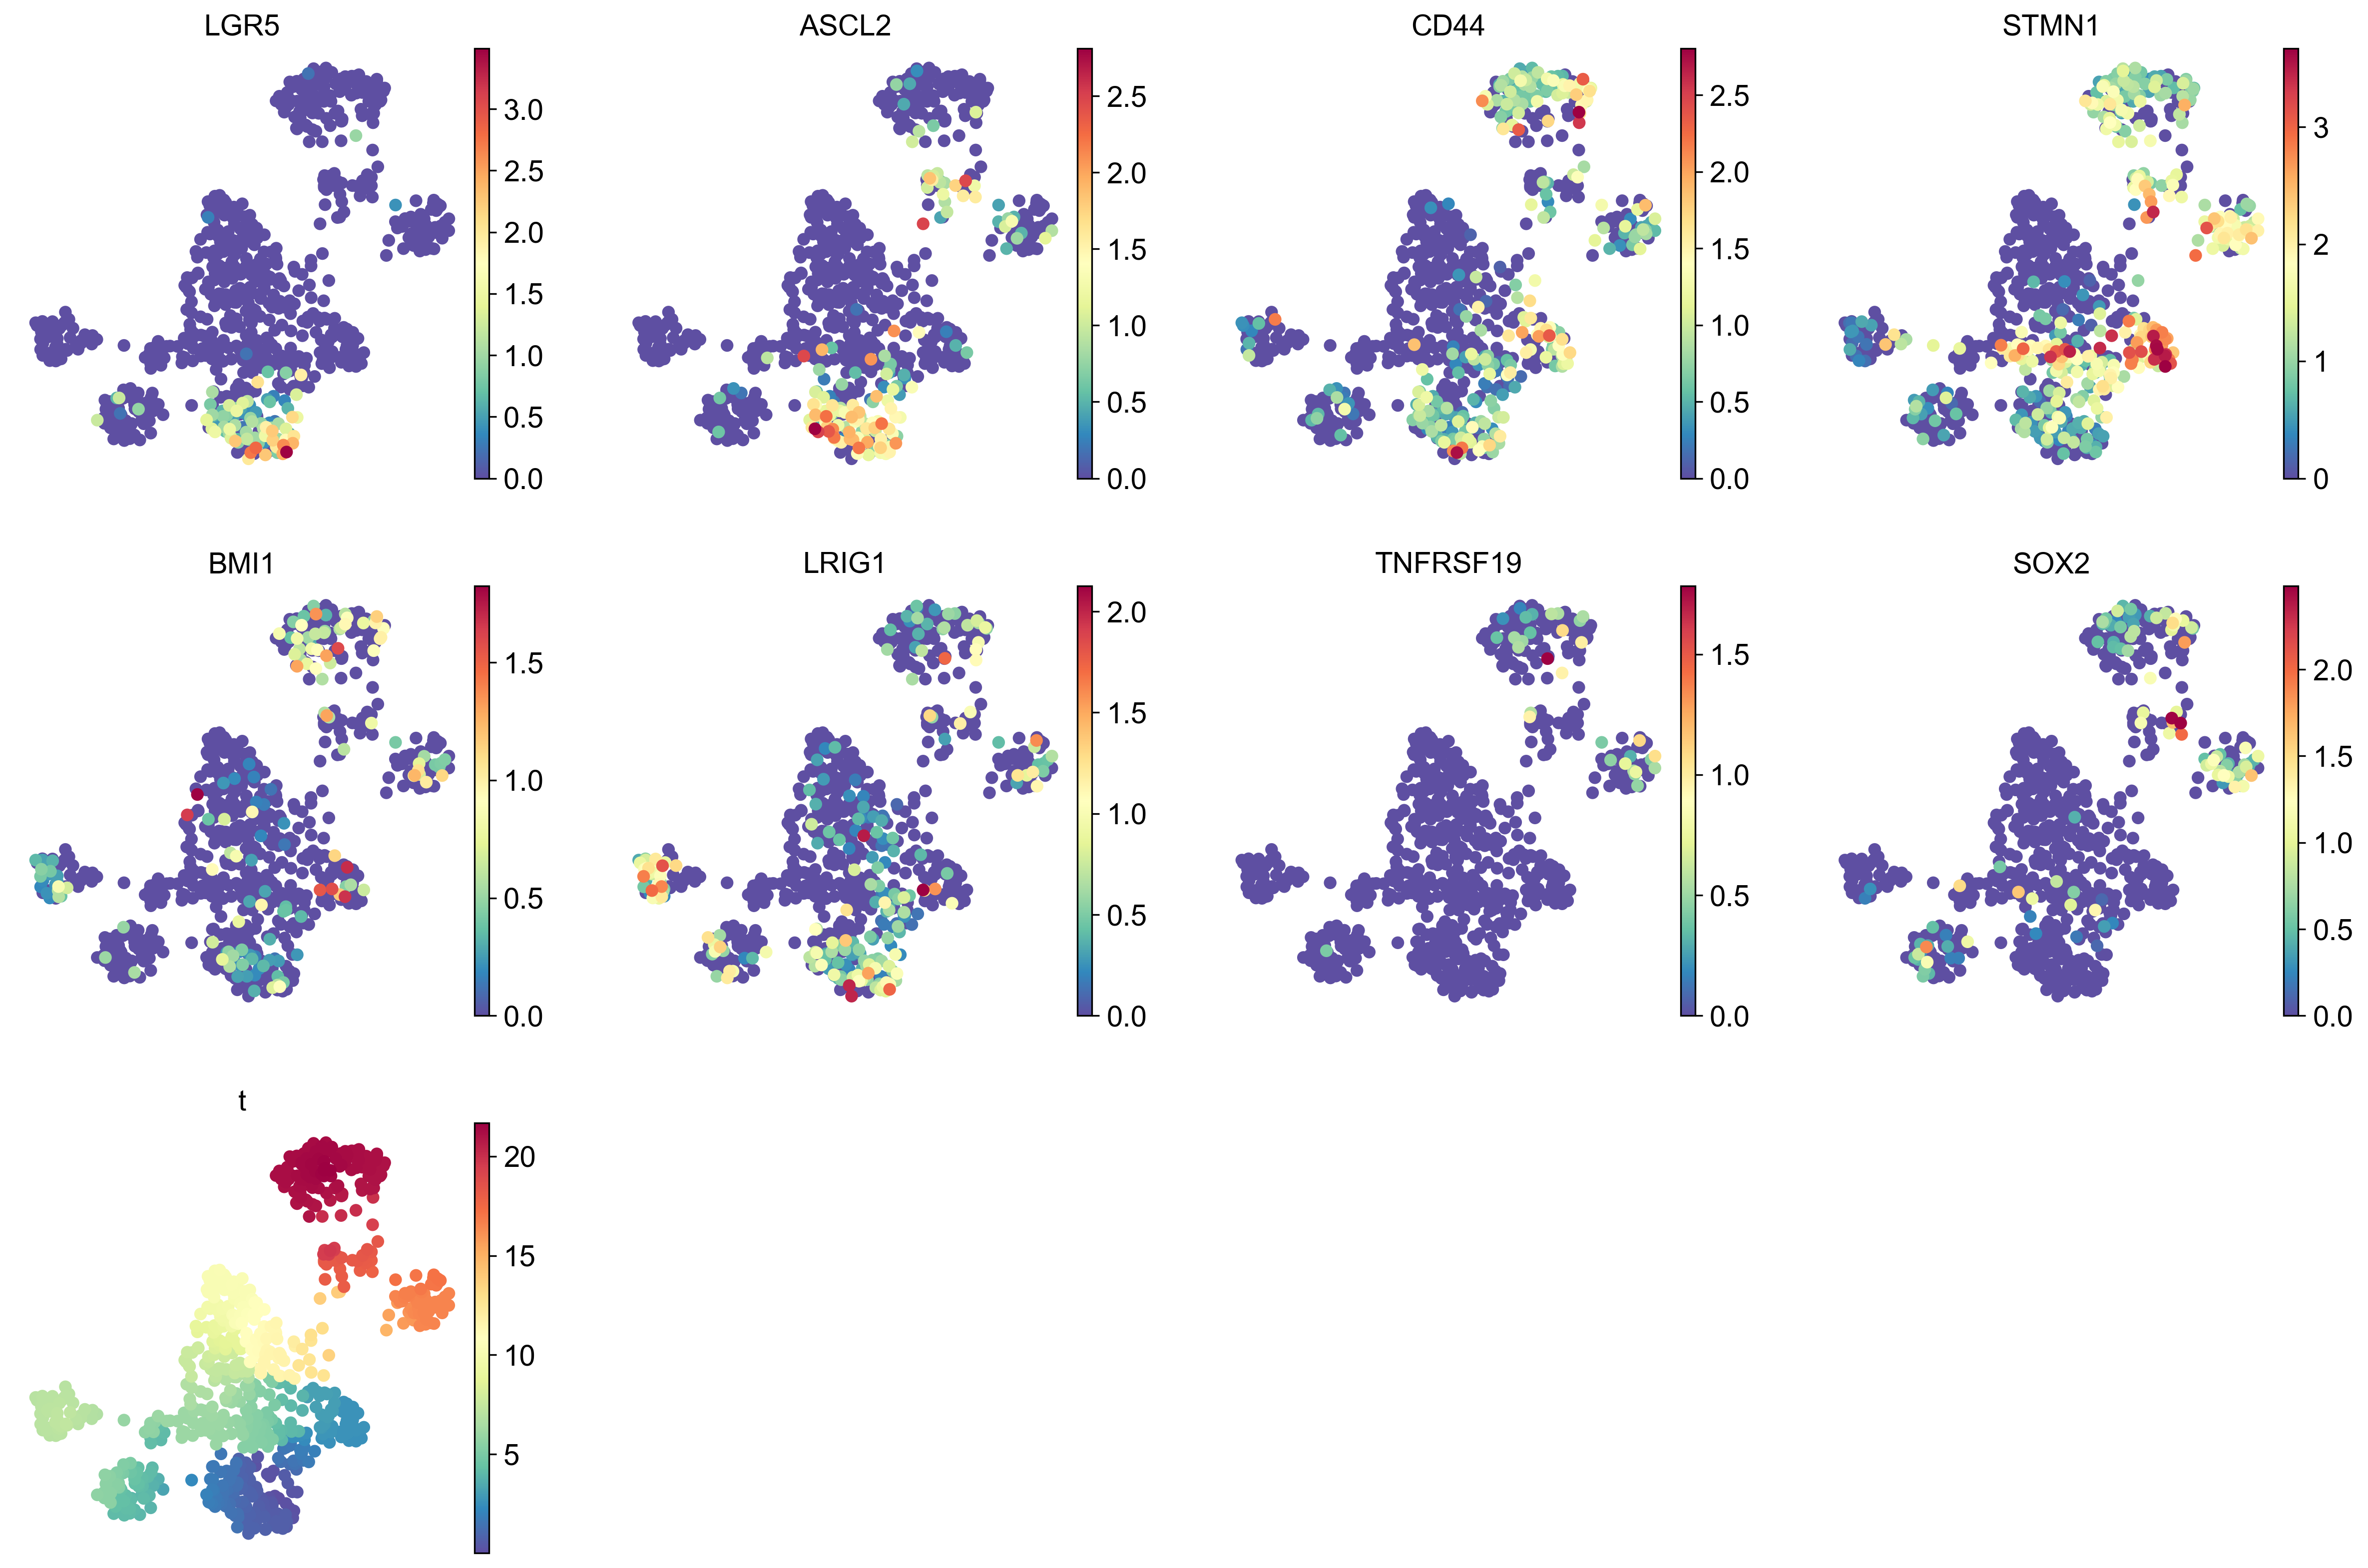

In [11]:
sc.pl.umap(adat, color = 'Stemness')
sc.pl.umap(adat, color = gastric_stem + ['t'])

In [12]:
import scanpy as sc
import pandas as pd

# Assuming `adata` is your AnnData object and `leiden` is the key for Leiden clusters
# Assuming `Stemness` is the name of the gene score in `adata.obs`

# Group by Leiden clusters and calculate the median Stemness score for each cluster
median_stemness = adat.obs.groupby('leiden')['Stemness'].median().reset_index()
median_stemness.columns = ['Leiden Cluster', 'Median Stemness']

# Rank the clusters based on the median Stemness scores
median_stemness['Rank'] = median_stemness['Median Stemness'].rank(method='min', ascending=False).astype(int)

# Sort the DataFrame by rank and reset the index
median_stemness = median_stemness.sort_values(by='Rank')
median_stemness.reset_index(drop=True, inplace=True)

# Display the DataFrame
median_stemness


,Leiden Cluster,Median Stemness,Rank
0,1,0.485069,1
1,2,-0.001659,2
2,7,-0.039642,3
3,5,-0.039661,4
4,9,-0.099771,5
5,0,-0.128086,6
6,8,-0.186780,7
7,6,-0.242134,8
8,3,-0.290225,9
9,4,-0.352412,10


In [13]:
# Create a dictionary to map Leiden clusters to their median Stemness and rank
median_stemness_dict = median_stemness.set_index('Leiden Cluster')['Median Stemness'].to_dict()
rank_dict = median_stemness.set_index('Leiden Cluster')['Rank'].to_dict()

In [14]:
# Map the median Stemness and rank to each cell
adat.obs['Median Stemness'] = adat.obs['leiden'].map(median_stemness_dict)
adat.obs['Rank'] = adat.obs['leiden'].map(rank_dict)

C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


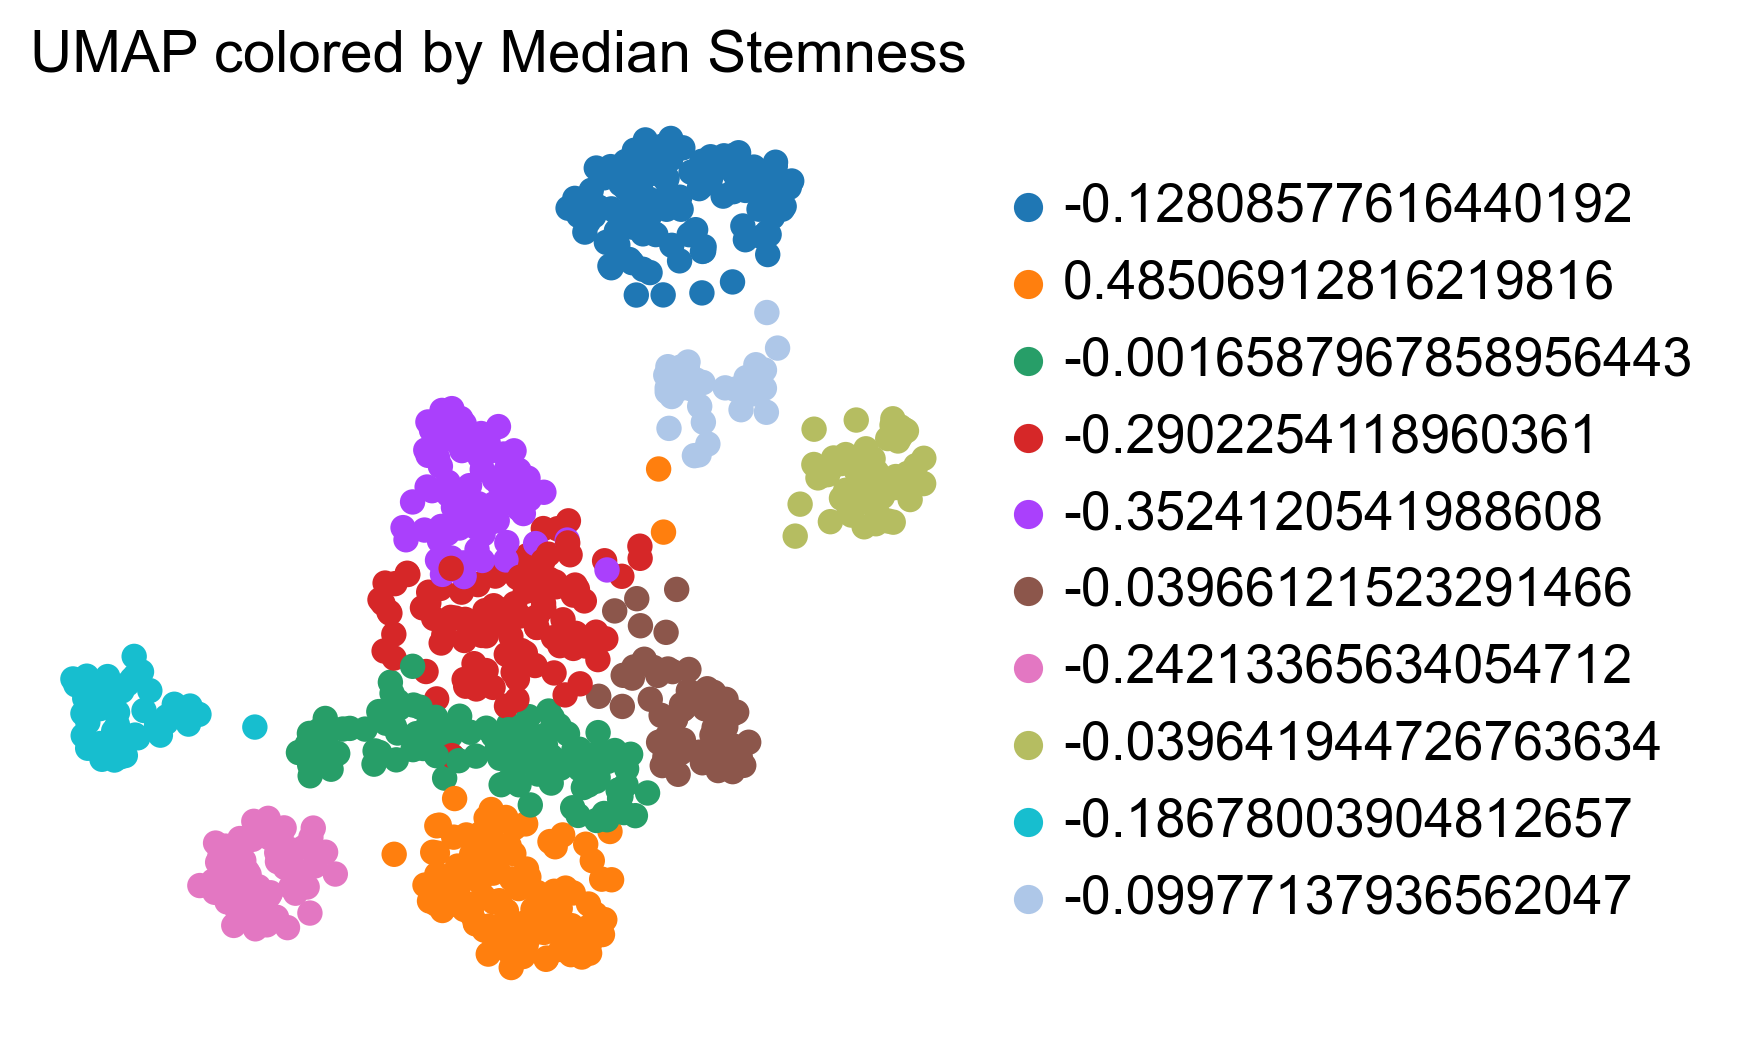

C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


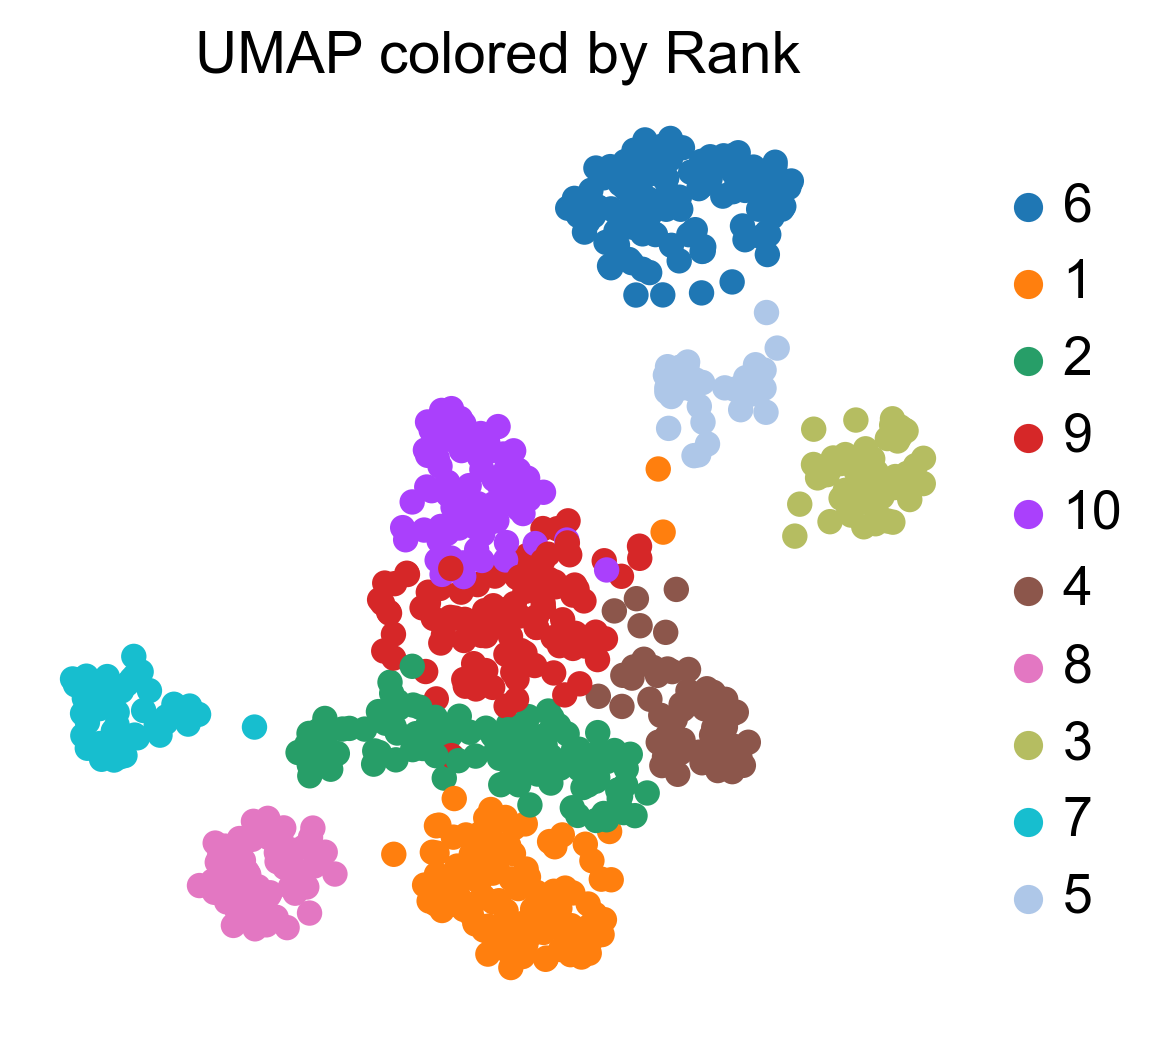

In [15]:
# Plot UMAP colored by Median Stemness
sc.pl.umap(adat, color='Median Stemness', title='UMAP colored by Median Stemness')
# Plot UMAP colored by Rank
sc.pl.umap(adat, color='Rank', title='UMAP colored by Rank')

In [16]:
import scFates as scf
import os
import sys

inferring a principal curve --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01
    finished (0:00:00) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


C:\anaconda_envs\spyder\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


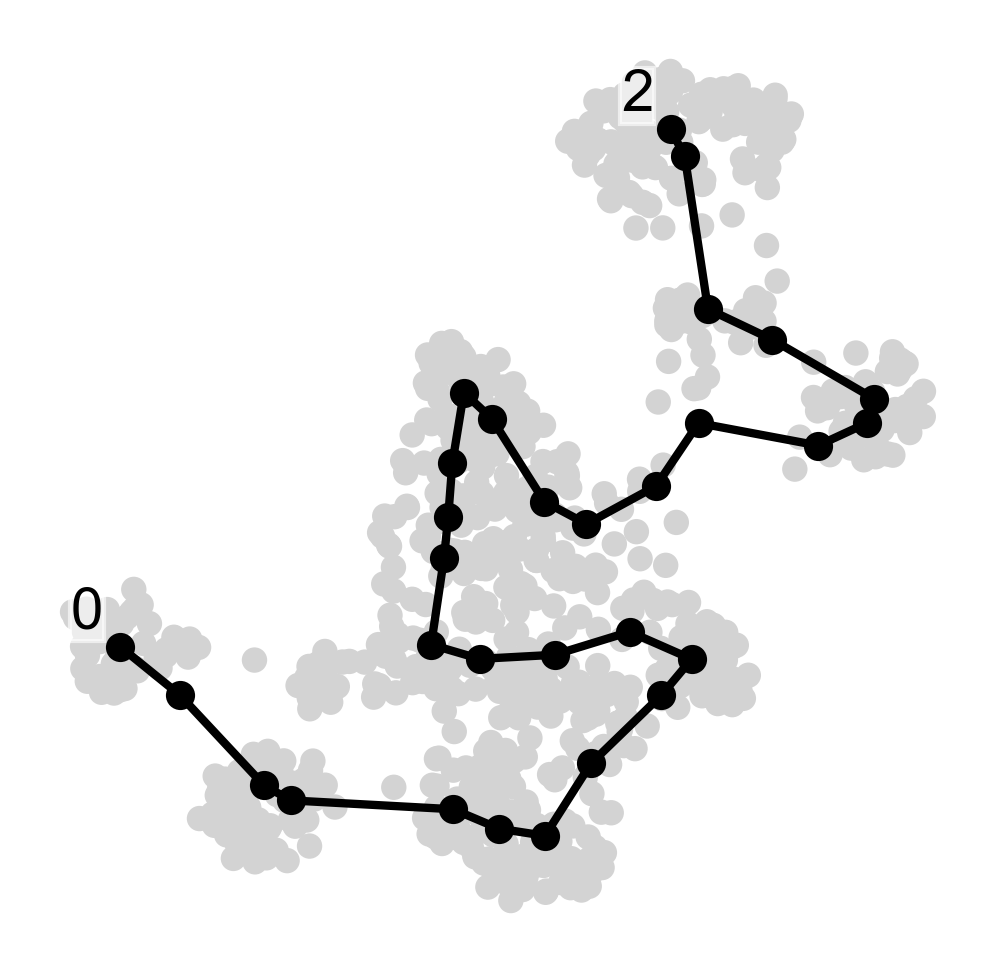

In [17]:
scf.tl.curve(adata = pat_ant, Nodes = 30, use_rep = 'umap', ndims_rep = 2)
scf.pl.graph(adata = pat_ant, basis = 'umap')

In [18]:
sc.pl.umap(sc.AnnData(pat_reproc.obsm["X_R"], obsm = pat_reproc.obsm), color = '1', cmap = "Reds")
sc.pl.umap(pat_reproc, color = 'LGR5')

NameError: name 'pat_reproc' is not defined

In [ ]:
scf.tl.root(pat_reproc, 'LGR5')
scf.tl.pseudotime(pat_reproc, n_jobs=20, n_map=100)
sc.pl.umap(pat_reproc, color = 't')

In [ ]:
scf.pl.trajectory(pat_reproc, basis='umap', arrows=True, arrow_offset=5)
sc.pl.umap(pat_reproc, color = ['ANPEP', 'MUC5AC', 'MUC6', 'leiden'])

In [ ]:
sc.pl.umap(pat_reproc, color = 'milestones')